In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df=pd.read_csv(r"C:\Users\prabh\Videos\Datasets\IPO.csv")

In [3]:
df.head()

,Company Name,Retail Investors,Qualified Investors,Non Instititional,Employee,Total,Listing Day gain
0,Latent View Analytics Limited,123.84,150.82,881.96,4.03,338.51,148.10
1,Sapphire Foods India Limited,7.76,7.50,3.46,NaN,6.45,4.04
2,Paytm,1.72,2.88,0.25,NaN,1.95,-27.44
3,Policy Bazaar,3.45,27.52,8.15,NaN,17.86,22.68
4,SJS enterprise limited,1.41,1.45,2.36,NaN,1.63,-5.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         60 non-null     object 
 1   Retail Investors     60 non-null     float64
 2   Qualified Investors  60 non-null     float64
 3   Non Instititional    60 non-null     float64
 4   Employee             24 non-null     float64
 5   Total                60 non-null     float64
 6   Listing Day gain     60 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [5]:
df.isna().sum()

Company Name            0
Retail Investors        0
Qualified Investors     0
Non Instititional       0
Employee               36
Total                   0
Listing Day gain        0
dtype: int64

In [6]:
df=df.drop('Employee',axis=1)

In [7]:
df.head()

,Company Name,Retail Investors,Qualified Investors,Non Instititional,Total,Listing Day gain
0,Latent View Analytics Limited,123.84,150.82,881.96,338.51,148.10
1,Sapphire Foods India Limited,7.76,7.50,3.46,6.45,4.04
2,Paytm,1.72,2.88,0.25,1.95,-27.44
3,Policy Bazaar,3.45,27.52,8.15,17.86,22.68
4,SJS enterprise limited,1.41,1.45,2.36,1.63,-5.87


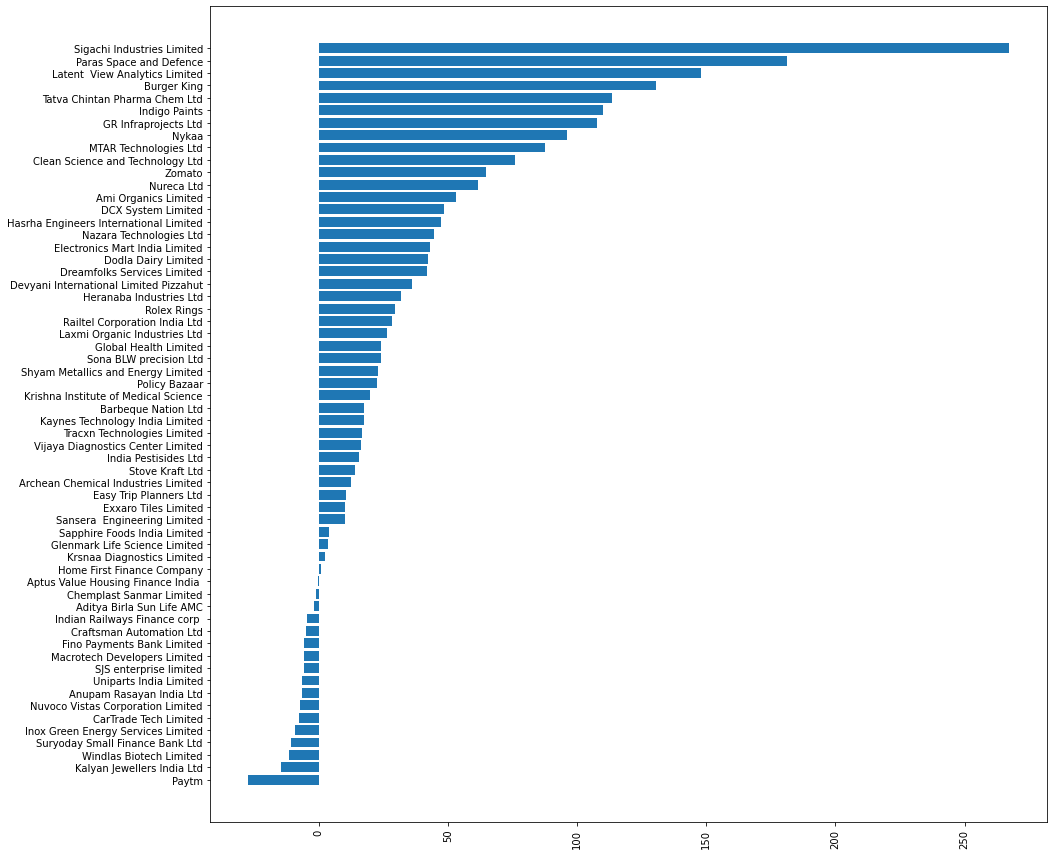

In [8]:
#which was most successful IPO
plt.figure(figsize=(15,15))
plt.barh(df.sort_values(by='Listing Day gain')['Company Name'],width=df.sort_values(by='Listing Day gain')['Listing Day gain'])
plt.xticks(rotation=90)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         60 non-null     object 
 1   Retail Investors     60 non-null     float64
 2   Qualified Investors  60 non-null     float64
 3   Non Instititional    60 non-null     float64
 4   Total                60 non-null     float64
 5   Listing Day gain     60 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.9+ KB


In [10]:
#Storing numeric columns in a variable
columns_numeric=[i for i in df.columns if df[i].dtype!='object']
columns_numeric

['Retail Investors',
 'Qualified Investors',
 'Non Instititional',
 'Total',
 'Listing Day gain']

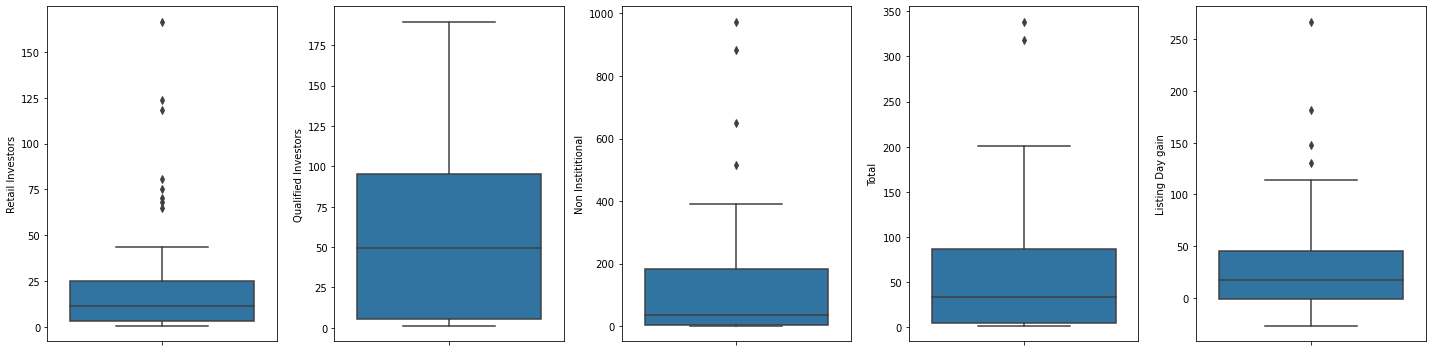

In [11]:
#Finding outliers
plt.figure(figsize=(20,5))
for j,i in enumerate(columns_numeric):
    plt.subplot(1,5,j+1)
    sns.boxplot(y=df[i])
    plt.tight_layout()
    
plt.show()

In [12]:
#outliers in Non Instititional
df.iloc[np.where(df['Non Instititional']>400)[0]]

,Company Name,Retail Investors,Qualified Investors,Non Instititional,Total,Listing Day gain
0,Latent View Analytics Limited,123.84,150.82,881.96,338.51,148.10
9,Paras Space and Defence,118.44,175.39,973.99,318.04,181.40
23,Tatva Chintan Pharma Chem Ltd,35.68,186.96,516.96,182.04,113.50
41,MTAR Technologies Ltd,28.40,164.99,650.79,200.79,87.62


In [13]:
#outliers in Retail Investors
df.iloc[np.where(df['Retail Investors']>75)[0]]

,Company Name,Retail Investors,Qualified Investors,Non Instititional,Total,Listing Day gain
0,Latent View Analytics Limited,123.84,150.82,881.96,338.51,148.10
5,Sigachi Industries Limited,80.49,86.51,172.43,101.91,267.18
9,Paras Space and Defence,118.44,175.39,973.99,318.04,181.40
36,Nazara Technologies Ltd,75.29,103.77,389.89,175.46,44.60
44,Nureca Ltd,166.65,3.10,31.59,39.93,61.44


In [14]:
#outliers in Listing Day gain column
df.iloc[np.where(df['Listing Day gain']>120)[0]]

,Company Name,Retail Investors,Qualified Investors,Non Instititional,Total,Listing Day gain
0,Latent View Analytics Limited,123.84,150.82,881.96,338.51,148.10
5,Sigachi Industries Limited,80.49,86.51,172.43,101.91,267.18
9,Paras Space and Defence,118.44,175.39,973.99,318.04,181.40
49,Burger King,68.15,86.64,354.11,156.65,130.70


<AxesSubplot:>

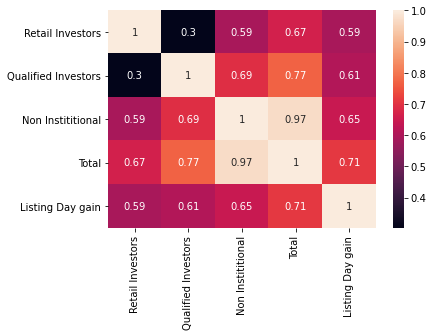

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#since non institutional investors has highest correlation with listing day gains hence removing outliers of this column and some of retail investors column
drop_index_NI = list(df.iloc[np.where(df['Non Instititional']>400)[0]].index)
drop_index_RI=list(df.iloc[np.where(df['Retail Investors']>75)[0]].index)

drop_index=drop_index_NI+drop_index_RI

drop_index

[0, 9, 23, 41, 0, 5, 9, 36, 44]

In [17]:
df=df.drop(index=drop_index)

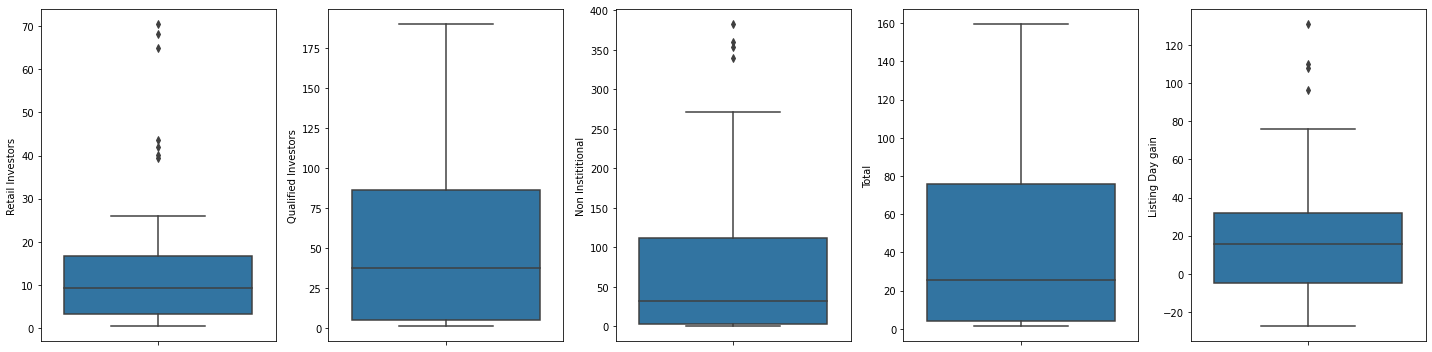

In [18]:
plt.figure(figsize=(20,5))
for j,i in enumerate(columns_numeric):
    plt.subplot(1,5,j+1)
    sns.boxplot(y=df[i])
    plt.tight_layout()
    
plt.show()

In [19]:
#dropping company naame
df=df.drop('Company Name',axis=1)

In [20]:
#defining X and y
X=df.drop('Listing Day gain',axis=1)
y=df['Listing Day gain']

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

In [22]:
model_etr=ExtraTreesRegressor()

model_etr.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model_etr.feature_importances_)

[0.12289088 0.31507542 0.20516269 0.35687102]


<BarContainer object of 4 artists>

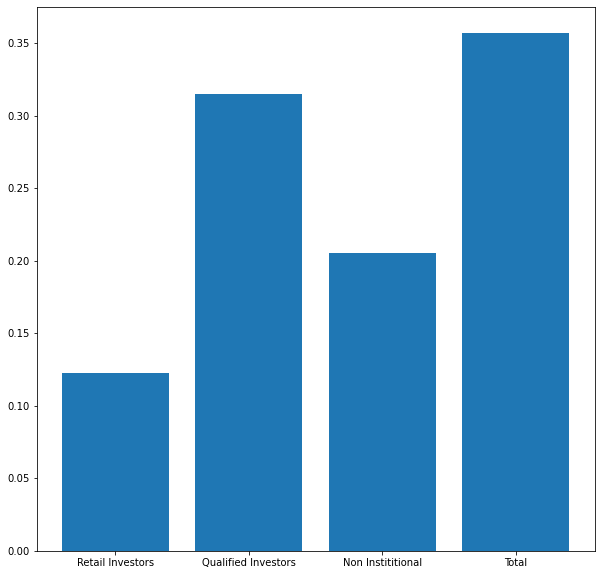

In [24]:
plt.figure(figsize=(10,10))
plt.bar(x=X.columns,height=model_etr.feature_importances_)

In [25]:
#Total subscription status is higly correlated to all hence dropping this column
X.drop('Total',axis=1,inplace=True)

In [26]:
#Making train and test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [27]:
X_train

,Retail Investors,Qualified Investors,Non Instititional
11,1.09,13.07,1.32
30,11.64,153.45,339.98
8,3.24,10.36,4.39
39,10.77,65.74,97.42
6,5.92,1.65,0.21
43,16.78,65.14,73.25
28,11.34,84.88,73.26
51,4.22,98.68,21.86
38,20.10,175.43,217.62
56,18.52,187.34,74.96


In [28]:
#preparing scaled training and testing data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
def evaluation_metrics(y_test,y_preds):
    
    #to compare all results later
    my_dict={}
    my_dict={"MSE":mean_squared_error(y_test,y_preds),
                   "RMSE":np.sqrt(mean_squared_error(y_test,y_preds)),
                   "R2 score":r2_score(y_test,y_preds)}
    
    return my_dict

In [31]:
def actual_vs_predicted(y_test,y_preds,model):
    #for plotting
    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, label="original")
    plt.plot(x_ax, y_preds, label="predicted")
    plt.title(f"{model} test and predicted data")
    plt.legend()
    plt.show()
    

In [32]:
#trying below models and find which once works best

# 1. RandomForestRegressor
# 2. Xgbooost
# 3. Catboost
# 4. Adaboost
# 5. Neural network
# 6. MLPRegressor

RandomForest

In [33]:
from sklearn.ensemble import RandomForestRegressor

model_1=RandomForestRegressor(n_estimators=275)

model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=275)

In [34]:
y_preds_1=model_1.predict(X_test)

In [35]:
evaluation_dict=dict()

In [36]:
evaluation_dict['RandomForest']=evaluation_metrics(y_test,y_preds_1)
evaluation_dict['RandomForest']

{'MSE': 543.8817698606159,
 'RMSE': 23.321272903952217,
 'R2 score': 0.6619819206919049}

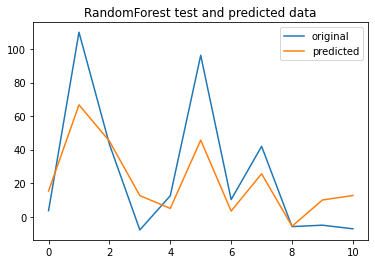

In [37]:
actual_vs_predicted(y_test,y_preds_1,'RandomForest')

XGboost

In [38]:
import xgboost as xg

In [39]:
model_2= xg.XGBRegressor(learning_rate=.1,n_jobs=1)

In [40]:
model_2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
y_preds_2=model_2.predict(X_test)

In [42]:
evaluation_dict['Xgboost']=evaluation_metrics(y_test,y_preds_2)
evaluation_dict['Xgboost']

{'MSE': 480.2126973943177,
 'RMSE': 21.913755894285163,
 'R2 score': 0.7015517293874629}

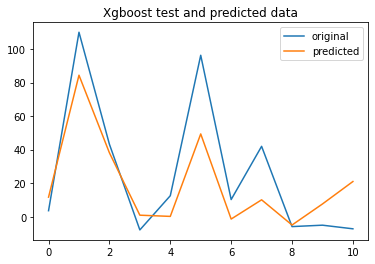

In [43]:
actual_vs_predicted(y_test,y_preds_2,'Xgboost')

In [44]:
from xgboost import XGBRFRegressor

In [45]:
model_test=XGBRFRegressor()

In [46]:
model_test.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [47]:
y_preds_test=model_test.predict(X_test)

In [48]:
evaluation_dict['XGBRFregressor']=evaluation_metrics(y_test,y_preds_test)

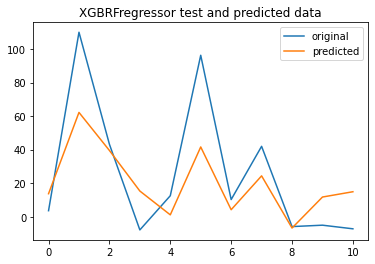

In [49]:
actual_vs_predicted(y_test,y_preds_test,model='XGBRFregressor')

Catboost

In [50]:
import catboost as cat

In [51]:
model_3=cat.CatBoostRegressor()

In [52]:
model_3.fit(X_train,y_train)

Learning rate set to 0.022199
0:	learn: 31.0375395	total: 173ms	remaining: 2m 52s
1:	learn: 30.8475874	total: 175ms	remaining: 1m 27s
2:	learn: 30.6703837	total: 176ms	remaining: 58.4s
3:	learn: 30.4876610	total: 176ms	remaining: 43.9s
4:	learn: 30.3029274	total: 177ms	remaining: 35.3s
5:	learn: 30.1156184	total: 178ms	remaining: 29.5s
6:	learn: 29.9239036	total: 179ms	remaining: 25.4s
7:	learn: 29.7716336	total: 179ms	remaining: 22.2s
8:	learn: 29.6155964	total: 180ms	remaining: 19.8s
9:	learn: 29.4181401	total: 180ms	remaining: 17.9s
10:	learn: 29.2278818	total: 181ms	remaining: 16.3s
11:	learn: 29.0377042	total: 182ms	remaining: 14.9s
12:	learn: 28.8508975	total: 182ms	remaining: 13.8s
13:	learn: 28.6581255	total: 183ms	remaining: 12.9s
14:	learn: 28.5123368	total: 184ms	remaining: 12.1s
15:	learn: 28.3623301	total: 184ms	remaining: 11.3s
16:	learn: 28.1929835	total: 185ms	remaining: 10.7s
17:	learn: 28.0184213	total: 186ms	remaining: 10.1s
18:	learn: 27.8644497	total: 187ms	remaini

217:	learn: 14.8655320	total: 305ms	remaining: 1.09s
218:	learn: 14.8445362	total: 306ms	remaining: 1.09s
219:	learn: 14.8187379	total: 306ms	remaining: 1.08s
220:	learn: 14.7610015	total: 307ms	remaining: 1.08s
221:	learn: 14.7025451	total: 308ms	remaining: 1.08s
222:	learn: 14.6692425	total: 308ms	remaining: 1.07s
223:	learn: 14.6163244	total: 309ms	remaining: 1.07s
224:	learn: 14.5773189	total: 309ms	remaining: 1.06s
225:	learn: 14.5551766	total: 310ms	remaining: 1.06s
226:	learn: 14.5220155	total: 310ms	remaining: 1.06s
227:	learn: 14.4817479	total: 311ms	remaining: 1.05s
228:	learn: 14.4545363	total: 312ms	remaining: 1.05s
229:	learn: 14.4170993	total: 312ms	remaining: 1.04s
230:	learn: 14.3637416	total: 313ms	remaining: 1.04s
231:	learn: 14.3302674	total: 314ms	remaining: 1.04s
232:	learn: 14.2923194	total: 314ms	remaining: 1.03s
233:	learn: 14.2596664	total: 315ms	remaining: 1.03s
234:	learn: 14.2368103	total: 316ms	remaining: 1.03s
235:	learn: 14.2041824	total: 317ms	remaining:

427:	learn: 8.9698750	total: 439ms	remaining: 586ms
428:	learn: 8.9580965	total: 440ms	remaining: 585ms
429:	learn: 8.9343792	total: 440ms	remaining: 584ms
430:	learn: 8.9118383	total: 441ms	remaining: 582ms
431:	learn: 8.8884051	total: 442ms	remaining: 581ms
432:	learn: 8.8718371	total: 442ms	remaining: 579ms
433:	learn: 8.8602418	total: 443ms	remaining: 578ms
434:	learn: 8.8370761	total: 444ms	remaining: 576ms
435:	learn: 8.8206759	total: 444ms	remaining: 574ms
436:	learn: 8.8044303	total: 445ms	remaining: 573ms
437:	learn: 8.7814956	total: 445ms	remaining: 571ms
438:	learn: 8.7653843	total: 446ms	remaining: 570ms
439:	learn: 8.7540213	total: 446ms	remaining: 568ms
440:	learn: 8.7313471	total: 448ms	remaining: 568ms
441:	learn: 8.7153986	total: 449ms	remaining: 567ms
442:	learn: 8.6996007	total: 450ms	remaining: 565ms
443:	learn: 8.6884212	total: 450ms	remaining: 564ms
444:	learn: 8.6659851	total: 451ms	remaining: 562ms
445:	learn: 8.6455792	total: 452ms	remaining: 561ms
446:	learn: 

647:	learn: 5.4890921	total: 571ms	remaining: 310ms
648:	learn: 5.4773695	total: 571ms	remaining: 309ms
649:	learn: 5.4711889	total: 572ms	remaining: 308ms
650:	learn: 5.4591361	total: 573ms	remaining: 307ms
651:	learn: 5.4475065	total: 574ms	remaining: 306ms
652:	learn: 5.4413827	total: 574ms	remaining: 305ms
653:	learn: 5.4294222	total: 575ms	remaining: 304ms
654:	learn: 5.4178846	total: 575ms	remaining: 303ms
655:	learn: 5.4074599	total: 576ms	remaining: 302ms
656:	learn: 5.4014464	total: 577ms	remaining: 301ms
657:	learn: 5.3900059	total: 578ms	remaining: 300ms
658:	learn: 5.3780966	total: 578ms	remaining: 299ms
659:	learn: 5.3721383	total: 579ms	remaining: 298ms
660:	learn: 5.3607878	total: 580ms	remaining: 297ms
661:	learn: 5.3489698	total: 580ms	remaining: 296ms
662:	learn: 5.3424767	total: 581ms	remaining: 295ms
663:	learn: 5.3311944	total: 581ms	remaining: 294ms
664:	learn: 5.3194669	total: 582ms	remaining: 293ms
665:	learn: 5.3135976	total: 582ms	remaining: 292ms
666:	learn: 

861:	learn: 3.6206006	total: 701ms	remaining: 112ms
862:	learn: 3.6132511	total: 701ms	remaining: 111ms
863:	learn: 3.6071551	total: 702ms	remaining: 110ms
864:	learn: 3.5992624	total: 703ms	remaining: 110ms
865:	learn: 3.5932233	total: 704ms	remaining: 109ms
866:	learn: 3.5854153	total: 705ms	remaining: 108ms
867:	learn: 3.5757598	total: 705ms	remaining: 107ms
868:	learn: 3.5681029	total: 706ms	remaining: 106ms
869:	learn: 3.5603814	total: 706ms	remaining: 106ms
870:	learn: 3.5573590	total: 707ms	remaining: 105ms
871:	learn: 3.5497539	total: 708ms	remaining: 104ms
872:	learn: 3.5467573	total: 708ms	remaining: 103ms
873:	learn: 3.5390805	total: 709ms	remaining: 102ms
874:	learn: 3.5315266	total: 709ms	remaining: 101ms
875:	learn: 3.5285488	total: 710ms	remaining: 100ms
876:	learn: 3.5209232	total: 710ms	remaining: 99.6ms
877:	learn: 3.5118492	total: 711ms	remaining: 98.8ms
878:	learn: 3.5077661	total: 711ms	remaining: 97.9ms
879:	learn: 3.5002736	total: 712ms	remaining: 97.1ms
880:	lea

In [53]:
y_preds_3=model_3.predict(X_test)

In [54]:
evaluation_dict['Catboost']=evaluation_metrics(y_test,y_preds_3)

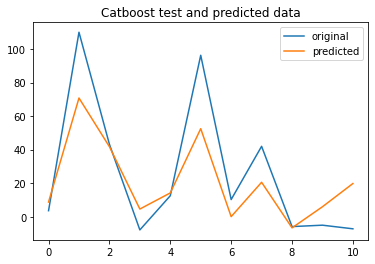

In [55]:
actual_vs_predicted(y_test,y_preds_3,model='Catboost')

Adaboost

In [56]:
from sklearn.ensemble import AdaBoostRegressor

model_4=AdaBoostRegressor(random_state=42,loss='exponential')

In [57]:
model_4.fit(X_train,y_train)

AdaBoostRegressor(loss='exponential', random_state=42)

In [58]:
y_preds_4=model_4.predict(X_test)

In [59]:
evaluation_dict['Adaboost']=evaluation_metrics(y_test,y_preds_4)

In [60]:
evaluation_dict['Adaboost']

{'MSE': 595.662537414336,
 'RMSE': 24.40619874979174,
 'R2 score': 0.6298005964344419}

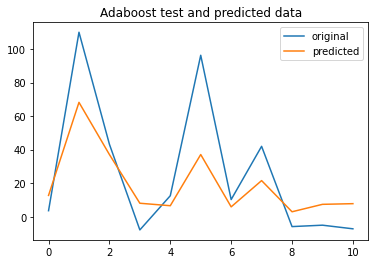

In [61]:
actual_vs_predicted(y_test,y_preds_4,'Adaboost')

Neural Network

In [62]:
# del model_5
model_5=tf.keras.models.Sequential()
model_5.add(tf.keras.layers.Dense(25,activation='relu'))
model_5.add(tf.keras.layers.Dense(1))



model_5.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(lr=.8),
               metrics=tf.keras.metrics.mean_absolute_error)


model_5.fit(X_train_scaled,y_train,epochs=200,verbose=0)

C:\Users\prabh\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [63]:
y_preds_5=model_5.predict(X_test_scaled)

1/1 [==============================] - 0s 78ms/step


In [64]:
evaluation_dict['Neural Model']=evaluation_metrics(y_test,y_preds_5)

In [65]:
evaluation_dict['Neural Model']

{'MSE': 718.7984622842173,
 'RMSE': 26.810417047935253,
 'R2 score': 0.5532726245022148}

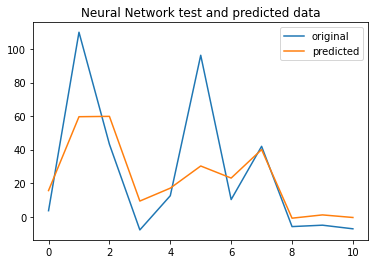

In [66]:
actual_vs_predicted(y_test,y_preds_5,model='Neural Network')

MLPRegressor

In [67]:
from sklearn.neural_network import MLPRegressor

In [68]:
# del model_6
model_6=MLPRegressor(hidden_layer_sizes=(14))

In [69]:
model_6.fit(X_train,y_train)

C:\Users\prabh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=14)

In [70]:
y_preds_6=model_6.predict(X_test)
evaluation_dict['MLPRegressor']=evaluation_metrics(y_test,y_preds_6)
evaluation_dict['MLPRegressor']

{'MSE': 611.3284338975656,
 'RMSE': 24.725056802716665,
 'R2 score': 0.620064369678289}

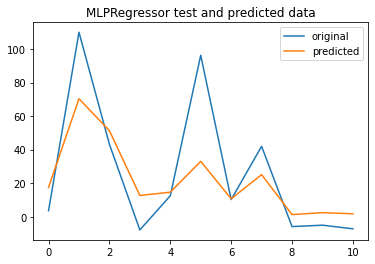

In [71]:
actual_vs_predicted(y_test,y_preds_6,model='MLPRegressor')

In [72]:
eval_df=pd.DataFrame(data=evaluation_dict)

In [73]:
index=eval_df.index

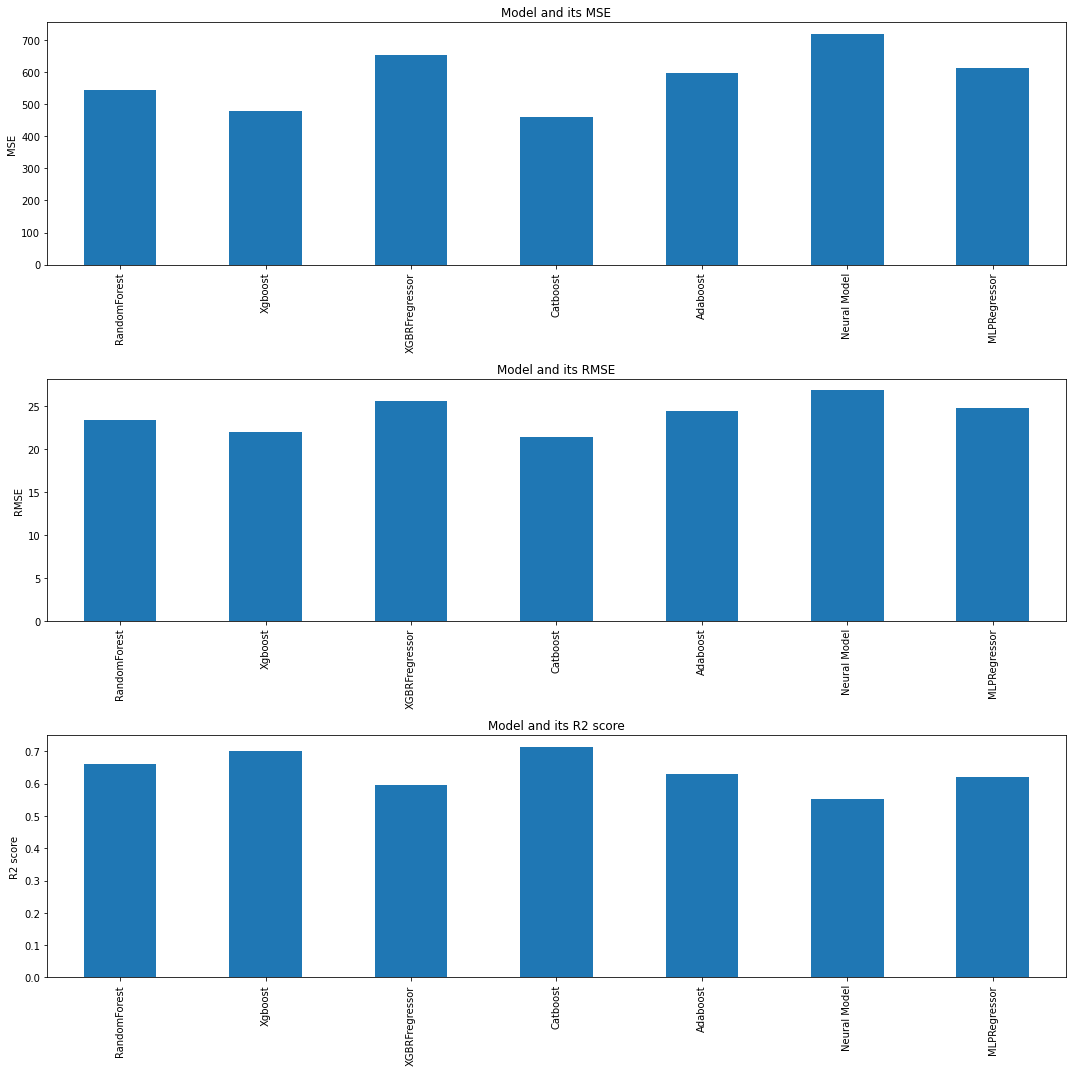

In [74]:
plt.figure(figsize=(15,15))
for i in range(len(index)):
    plt.subplot(3,1,i+1)
    eval_df.iloc[i].plot(kind='bar')
    plt.ylabel(f'{index[i]}')
    plt.title(f'Model and its {index[i]}')
    plt.tight_layout()

In [75]:
#Conclusion: Xgboost and Catboost are best models among all

In [76]:
#creating a custom function to predict new listing day gains

def custom_predict(model,issue_price,x=[]):
    """Takes list input in order of Retail Investors,Qualified Investors,Non Instititional
    # model_1= RandomForestRegressor
    # model_2= Xgbooost
    # model_3= Catboost
    # model_4= Adaboost
    # model_5= Neural network
    # model_6= MLPRegressor
    """
    x=np.array(x)
    x=np.expand_dims(x,axis=0)
    
    gain=model.predict(x)
    closing_price = issue_price * (1+gain/100)
    
    return f'Listing day gains are {gain} and closing price is {closing_price}'
    

In [77]:
custom_predict(model=model_2,x=[20.71,1.06,8.28],issue_price=65)

'Listing day gains are [-4.2458644] and closing price is [62.24019]'